Training and Testing Data
=====================================
To evaluate how well our supervised models generalize, we can split our data into a training and a test set:

<img src="figures/train_test_split.svg" width="100%">


In [8]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)
print(y.shape)
classifier = KNeighborsClassifier()

(150, 4)
(150,)


Thinking about how machine learning is normally performed, the idea of a train/test split makes sense. Real world systems train on the data they have, and as other data comes in (from customers, sensors, or other sources) the classifier that was trained must predict on fundamentally *new* data. We can simulate this during training using a train/test split - the test data is a simulation of "future data" which will come into the system during production. 

Specifically for iris, the labels in iris are sorted, which means that if we split the data using a proportional split, we will get all of specific labels (0 and 1) and very little of another (2). We want to split as illustrated above, but *after* the data has been randomly shuffled.

测试数据：将来会进到系统的数据

In [14]:
print(y)

[0 2 0 0 1 0 1 0 2 1 0 1 1 0 0 1 2 2 2 0 0 0 2 0 1 2 0 1 2 2 0 1 0 1 2 2 1
 1 2 1 1 1 0 0 0 2 0 1 1 1 2 0 2 0 0 2 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 2
 0 1 0 1 1 2 2 1 0 2 1 2 1 2 1 2 1 2 1 0 2 1 2 2 0 2 2 1 1 0 2 0 0 1 1 0 1
 2 2 0 1 2 1 0 0 2 2 1 0 0 2 2 0 2 0 2 2 1 2 1 2 2 1 2 2 0 2 0 2 1 0 2 0 2
 2 1]


To get an accurate simulation of the real world, we will shuffle our data then split.
为了测试，我们会把所有的数据混淆，然后，分成两部分。

In [13]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))#从新排列
print(permutation)#一组随机数数组
#print(permutation.shape)#150的数组,和X长度相同，值是0-150之间
#print(X)
#print('--------')
#print(X[permutation])
X, y = X[permutation], y[permutation]#从新排列后的数据
print(y)

[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110
 124  41 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28
  55  75  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49
 136  99  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36
  21   9 103  67 117  47]
[0 2 0 0 1 0 1 0 2 1 0 1 1 0 0 1 2 2 2 0 0 0 2 0 1 2 0 1 2 2 0 1 0 1 2 2 1
 1 2 1 1 1 0 0 0 2 0 1 1 1 2 0 2 0 0 2 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 2
 0 1 0 1 1 2 2 1 0 2 1 2 1 2 1 2 1 2 1 0 2 1 2 2 0 2 2 1 1 0 2 0 0 1 1 0 1
 2 2 0 1 2 1 0 0 2 2 1 0 0 2 2 0 2 0 2 2 1 2 1 2 2 1 2 2 0 2 0 2 1 0 2 0 2
 2 1]


Now we need to split the data into training and testing. Luckily, this is a common pattern in machine learning and scikit-learn has a prebuilt function to split data into training and testing for you. Here we use 50% of the data as training, and 50% testing. 80% and 20% is another common split, but there are no hard and fast rules. The most important thing is to fairly evaluate your system on data it *has not* seen during training!

In [15]:
from sklearn.cross_validation import train_test_split
#把数据分割为test数据和traning数据
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
[1 2 2 2 0 0 2 0 0 2 1 0 1 0 2 1 2 2 1 2 0 0 2 2 2 1 2 2 1 2 1 1 1 0 0 0 0
 1 0 2 0 1 1 0 2 2 0 2 2 1 2 0 1 2 0 0 1 1 0 1 2 0 0 0 1 1 2 2 0 2 2 1 1 1
 0]
[2 2 2 1 1 1 2 1 0 2 2 2 1 1 1 1 0 1 0 0 0 2 1 2 1 2 0 1 0 1 0 2 1 0 2 2 0
 0 1 2 1 1 1 1 1 1 1 2 0 1 1 2 0 0 1 1 0 0 2 0 2 1 0 2 0 0 2 0 0 2 2 0 0 2
 0]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


By evaluating our classifier performance on data that has been seen during training, we could get false confidence in the power of our system. This might lead to putting a system into production which *fails* at predicting new data! It is much better to use a train/test split in order to properly see how your trained model is doing on new data.

In [ ]:
使用training的数据测试系统，可能得到错误的预测效果。

In [25]:
classifier.fit(train_X, train_y)#traning 系统
pred_y = classifier.predict(test_X)#用测试数据得到预测值
print(test_X)
print("Fraction Correct")
print(np.sum(pred_y == test_y) / float(len(test_y)))
#预测值和实际数据相同的个数 占 总实际数据个数 比例

[[ 6.7  2.5  5.8  1.8]
 [ 6.1  2.6  5.6  1.4]
 [ 6.4  2.8  5.6  2.2]
 [ 6.8  2.8  4.8  1.4]
 [ 5.5  2.6  4.4  1.2]
 [ 6.2  2.2  4.5  1.5]
 [ 6.   2.2  5.   1.5]
 [ 5.7  2.8  4.1  1.3]
 [ 4.6  3.1  1.5  0.2]
 [ 5.7  2.5  5.   2. ]
 [ 6.7  3.1  5.6  2.4]
 [ 7.2  3.6  6.1  2.5]
 [ 5.5  2.5  4.   1.3]
 [ 5.8  2.6  4.   1.2]
 [ 5.9  3.2  4.8  1.8]
 [ 5.   2.   3.5  1. ]
 [ 5.1  3.8  1.6  0.2]
 [ 6.   3.4  4.5  1.6]
 [ 5.4  3.9  1.3  0.4]
 [ 5.   3.4  1.6  0.4]
 [ 4.6  3.2  1.4  0.2]
 [ 6.4  2.7  5.3  1.9]
 [ 5.5  2.3  4.   1.3]
 [ 6.9  3.2  5.7  2.3]
 [ 5.5  2.4  3.8  1.1]
 [ 7.7  3.   6.1  2.3]
 [ 4.7  3.2  1.3  0.2]
 [ 6.1  2.9  4.7  1.4]
 [ 4.8  3.   1.4  0.1]
 [ 6.3  2.3  4.4  1.3]
 [ 4.8  3.4  1.6  0.2]
 [ 7.2  3.   5.8  1.6]
 [ 5.6  3.   4.1  1.3]
 [ 5.   3.3  1.4  0.2]
 [ 6.4  2.8  5.6  2.1]
 [ 6.3  2.7  4.9  1.8]
 [ 5.4  3.4  1.7  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 6.3  2.5  4.9  1.5]
 [ 6.8  3.   5.5  2.1]
 [ 5.6  2.5  3.9  1.1]
 [ 5.6  2.7  4.2  1.3]
 [ 6.6  2.9  4.6  1.3]
 [ 6.   2.9

We can also visualize the correct and failed predictions

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)#正确的值所在的行号
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)#错误的值所在的行号
print(test_X[incorrect_idx])#错误的值，一个四列的数组，每一列代表一个feature
print(test_X[incorrect_idx, 0])#错误的值，一个四列的数组，0表示取第一列
print(test_X[incorrect_idx, 1])#错误的值，一个四列的数组，0表示取第二列

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25
 26 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48 49 51 52 53
 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72 73 74]
[14 27 38 50 63]
[[ 5.9  3.2  4.8  1.8]
 [ 6.1  2.9  4.7  1.4]
 [ 6.3  2.5  4.9  1.5]
 [ 6.   2.7  5.1  1.6]
 [ 4.9  2.5  4.5  1.7]]
[ 5.9  6.1  6.3  6.   4.9]
[ 3.2  2.9  2.5  2.7  2.5]


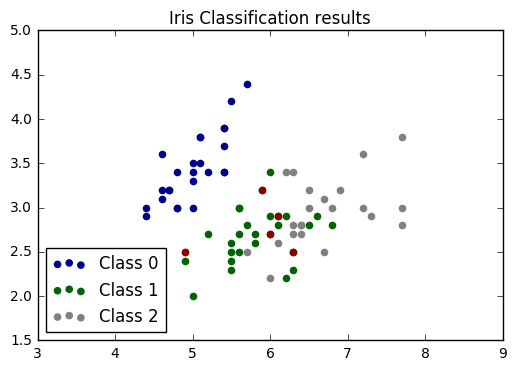

In [24]:
# Plot two dimensions
colors = ["darkblue", "darkgreen", "gray"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 0], test_X[idx, 1], color=color, label="Class %s" % str(n))
plt.scatter(test_X[incorrect_idx, 0], test_X[incorrect_idx, 1], color="darkred")

# Make xlim larger to accommodate legend
plt.xlim(3, 9)
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

We can see that the errors occur in the area where green (class 1) and gray (class 2) overlap. This gives us insight about what features to add - any feature which helps separate class 1 and class 2 should improve classifier performance.